In [1]:
import pandas as pd
import mne
import numpy as np
from mne.channels import read_montage
from mne import Epochs, find_events
from mne import create_info
from mne.io import RawArray
from mne.time_frequency import psd_welch

# visualization stuff
%matplotlib inline 
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df1 = pd.read_csv('relaxed.csv')
df2= pd.read_csv('tense.csv')
df1['Marker'] = 1
df2.shape
df2['Marker'] = 2  #set df2 as second class
df = df1.append(df2)

In [3]:
df[df.Marker==0].shape  #check the size of 0

(0, 10)

In [4]:
df[df.Marker==1].shape  #double check the size of 1

(5664, 10)

In [5]:
df.rename(columns={'Unnamed: 1':'Cz',
                          'Unnamed: 2':'P3',
                          'Unnamed: 3':'Pz', 'Unnamed: 4': 'P4'}, 
                 inplace=True)

In [6]:
df.head()

timestamps         Cz         P3         Pz         P4  Unnamed: 5  \
0   15992.229  16040.350  49338.750  62379.652  27263.004 -187500.016   
1   15992.229  16034.717  49326.789  62468.812  27265.105 -187500.016   
2   15992.229  16051.525  49316.242  62284.680  27260.367 -187500.016   
3   15992.229  16054.699  49293.711  61927.496  27244.877 -187500.016   
4   15992.230  16054.141  49314.586  61986.148  27247.336 -187500.016   

   Unnamed: 6  Unnamed: 7  Unnamed: 8  Marker  
0 -187500.016 -187500.016 -187500.016       1  
1 -187500.016 -187500.016 -187500.016       1  
2 -187500.016 -187500.016 -187500.016       1  
3 -187500.016 -187500.016 -187500.016       1  
4 -187500.016 -187500.016 -187500.016       1

In [7]:
df = df.drop(["timestamps", "Unnamed: 5", "Unnamed: 6", "Unnamed: 7", "Unnamed: 8"], axis=1)

In [8]:
df.head()

Cz         P3         Pz         P4  Marker
0  16040.350  49338.750  62379.652  27263.004       1
1  16034.717  49326.789  62468.812  27265.105       1
2  16051.525  49316.242  62284.680  27260.367       1
3  16054.699  49293.711  61927.496  27244.877       1
4  16054.141  49314.586  61986.148  27247.336       1

In [9]:
sfreq = 250
ch_names = list(df.columns)
ch_types = ['eeg'] * 4 + ['stim']
ten_twenty_montage = mne.channels.make_standard_montage('standard_1020')

In [10]:
ch_types, ch_names, ten_twenty_montage

(['eeg', 'eeg', 'eeg', 'eeg', 'stim'],
 ['Cz', 'P3', 'Pz', 'P4', 'Marker'],
 <DigMontage | 0 extras (headshape), 0 HPIs, 3 fiducials, 94 channels>)

In [11]:
df = df.T

In [12]:
df.head(6)

0          1          2          3          4          5     \
Cz      16040.350  16034.717  16051.525  16054.699  16054.141  16041.378   
P3      49338.750  49326.789  49316.242  49293.711  49314.586  49337.094   
Pz      62379.652  62468.812  62284.680  61927.496  61986.148  62376.031   
P4      27263.004  27265.105  27260.367  27244.877  27247.336  27256.254   
Marker      1.000      1.000      1.000      1.000      1.000      1.000   

             6          7          8          9     ...       5006       5007  \
Cz      16042.518  16058.298  16068.021  16057.002  ...  16957.576  16833.457   
P3      49326.230  49313.781  49304.527  49318.477  ...  49376.656  49167.402   
Pz      62458.730  62275.715  61924.590  61969.117  ...  58897.184  56746.477   
P4      27261.037  27257.773  27250.643  27246.934  ...  26692.654  26657.740   
Marker      1.000      1.000      1.000      1.000  ...      2.000      2.000   

             5008       5009       5010       5011       5012       5013  \
Cz      16781.713  16899.014  17002.012  16947.004  16825.119  16779.410   
P3      49035.770  49198.938  49422.078  49373.641  49161.879  49037.180   
Pz      53756.215  54167.910  57629.035  58813.879  56671.395  53691.082   
P4      26645.648  26675.354  26690.039  26670.459  26640.285  26644.420   
Marker      2.000      2.000      2.000      2.000      2.000      2.000   

             5014       5015  
Cz      16893.516  17014.885  
P3      49199.363  49441.590  
Pz      54102.039  57569.824  
P4      26677.389  26705.551  
Marker      2.000      2.000  

[5 rows x 10680 columns]

In [13]:
df[:-1] *= -1e-6  #convert from uVolts to Volts

In [14]:
info = create_info(ch_names=ch_names, ch_types=ch_types, sfreq=sfreq,
                  montage=ten_twenty_montage)

DigMontage is a superset of info. 90 in DigMontage will be ignored. The ignored channels are: {'F10', 'P8', 'PO1', 'AF2', 'FT10', 'F3', 'M2', 'AF3', 'CP3', 'TP8', 'AF5', 'F5', 'Fpz', 'TP7', 'T5', 'T3', 'F7', 'CP5', 'F2', 'F9', 'PO3', 'AFz', 'T8', 'T7', 'CP1', 'PO8', 'O1', 'FC3', 'AF1', 'FC1', 'AF9', 'C5', 'T9', 'C2', 'Iz', 'F1', 'C1', 'O2', 'AF6', 'FC5', 'P6', 'FT7', 'FC2', 'PO10', 'FT8', 'O9', 'AF7', 'Oz', 'P2', 'PO7', 'PO5', 'A1', 'M1', 'Fp1', 'FC6', 'POz', 'TP9', 'CP6', 'PO6', 'P1', 'C3', 'O10', 'TP10', 'FT9', 'Fz', 'A2', 'CPz', 'PO2', 'FC4', 'C4', 'P10', 'P7', 'C6', 'Fp2', 'AF4', 'P5', 'T10', 'P9', 'CP2', 'PO9', 'T6', 'AF10', 'F6', 'F8', 'FCz', 'T4', 'AF8', 'CP4', 'F4', 'PO4'}


In [15]:
raw = mne.io.RawArray(df, info)

Creating RawArray with float64 data, n_channels=5, n_times=10680
    Range : 0 ... 10679 =      0.000 ...    42.716 secs
Ready.


In [16]:
raw.info

<Info | 17 non-empty fields
    bads : list | 0 items
    ch_names : list | Cz, P3, Pz, P4, Marker
    chs : list | 5 items (EEG: 4, STIM: 1)
    comps : list | 0 items
    custom_ref_applied : bool | False
    dev_head_t : Transform | 3 items
    dig : Digitization | 7 items (3 Cardinal, 4 EEG)
    events : list | 0 items
    highpass : float | 0.0 Hz
    hpi_meas : list | 0 items
    hpi_results : list | 0 items
    lowpass : float | 125.0 Hz
    meas_date : NoneType | unspecified
    nchan : int | 5
    proc_history : list | 0 items
    projs : list | 0 items
    sfreq : float | 250.0 Hz
    acq_pars : NoneType
    acq_stim : NoneType
    ctf_head_t : NoneType
    description : NoneType
    dev_ctf_t : NoneType
    device_info : NoneType
    experimenter : NoneType
    file_id : NoneType
    gantry_angle : NoneType
    helium_info : NoneType
    hpi_subsystem : NoneType
    kit_system_id : NoneType
    line_freq : NoneType
    meas_id : NoneType
    proj_id : NoneType
    proj_name 

Effective window size : 8.192 (s)


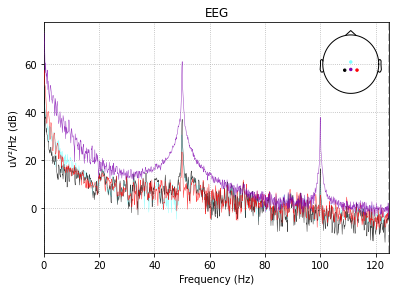

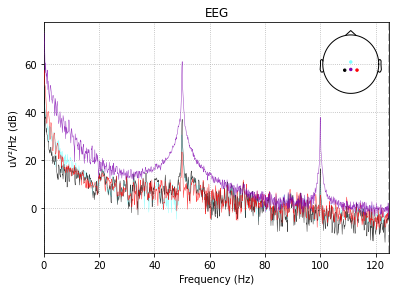

In [17]:
# compute the poweer spectral density (PSD) using 
# the MNE psd_welch function
# (this is simply a wrapper on scipy.signal.welch
#  that adds compatbility for MNE data types)

raw.plot_psd()

In [18]:
raw.notch_filter(np.arange(50, 125, 50), filter_length='auto', phase='zero') #250/2 based on Nyquist Theorem

Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1651 samples (6.604 sec)



<RawArray  |  None, n_channels x n_times : 5 x 10680 (42.7 sec), ~437 kB, data loaded>

Effective window size : 8.192 (s)


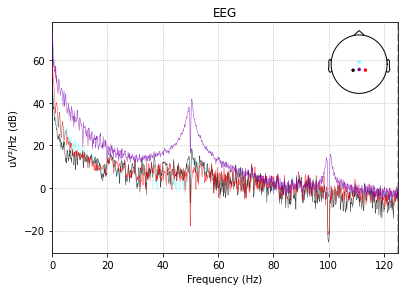

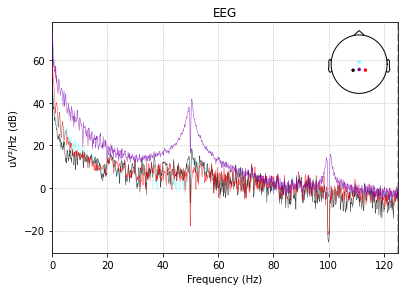

In [19]:
raw.plot_psd()

In [20]:
psd, freqs = psd_welch(raw)  #welch is a common method of computing power spectral density

Effective window size : 1.024 (s)


In [21]:
df_psd = pd.DataFrame(psd, columns=freqs).T

In [22]:
df_psd.tail() #ends at Nyquist Theroem frequency

0             1             2             3
121.093750  3.220421e-13  2.470661e-13  1.048233e-12  2.977400e-13
122.070312  2.317712e-13  2.654049e-13  1.358781e-12  4.017765e-13
123.046875  2.587776e-13  3.019679e-13  1.148692e-12  3.745412e-13
124.023438  3.214665e-13  3.517875e-13  1.625753e-12  3.906805e-13
125.000000  2.129565e-13  2.874850e-13  7.276263e-13  2.883784e-13

In [23]:
df_psd.columns = raw.ch_names[:4]

In [24]:
df_psd.index.names = ['freq']  #make the plot looks nice with name

In [25]:
df_psd.columns.names = ['chan'] #make the plot looks nice with name

In [26]:
df_psd.head()

chan                Cz            P3            Pz            P4
freq                                                            
0.000000  1.032587e-09  2.920489e-10  5.406978e-08  2.196937e-09
0.976562  3.874858e-09  1.194868e-09  3.530399e-07  7.163399e-09
1.953125  1.342570e-09  2.200225e-10  7.919518e-08  1.323746e-09
2.929688  5.747933e-10  9.266064e-11  3.064498e-08  3.101008e-10
3.906250  3.383849e-10  4.039363e-11  1.269141e-08  1.430473e-10

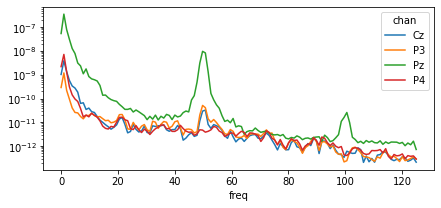

In [27]:
fig, ax = plt.subplots(figsize = (7, 3))
df_psd.plot(logy=True, ax = ax)

In [28]:
# These are the conventional EEG frequency band names and ranges

freqs = ['delta', 'theta', 'alpha', 'beta', 'lowgamma', 'midgamma']

freq_bands = dict(delta = [0.5,2],
                  theta = [4,8], 
                  alpha1 = [8,10],
                  alpha2 = [10,12],
                  beta = [12,20],
                  lowgamma=[20,30],
                  midgamma=[30,50])

In [29]:
freq_bands.items()

dict_items([('delta', [0.5, 2]), ('theta', [4, 8]), ('alpha1', [8, 10]), ('alpha2', [10, 12]), ('beta', [12, 20]), ('lowgamma', [20, 30]), ('midgamma', [30, 50])])

In [30]:
# Average the power within each of these bands

psd_fb = {}
for band_name, (rlow,rhigh) in freq_bands.items():
    psd_fb[band_name] = df_psd.loc[rlow:rhigh].mean(axis=0)

In [31]:
psd_fb

{'delta': chan
 Cz    2.608714e-09
 P3    7.074452e-10
 Pz    2.161176e-07
 P4    4.243573e-09
 dtype: float64,
 'theta': chan
 Cz    1.482057e-10
 P3    2.074775e-11
 Pz    3.605767e-09
 P4    5.681035e-11
 dtype: float64,
 'alpha1': chan
 Cz    3.738244e-11
 P3    1.951841e-11
 Pz    1.301786e-09
 P4    1.874296e-11
 dtype: float64,
 'alpha2': chan
 Cz    2.713725e-11
 P3    2.173424e-11
 Pz    6.463300e-10
 P4    2.212045e-11
 dtype: float64,
 'beta': chan
 Cz    9.240451e-12
 P3    1.308661e-11
 Pz    1.929036e-10
 P4    8.664552e-12
 dtype: float64,
 'lowgamma': chan
 Cz    7.441176e-12
 P3    1.022655e-11
 Pz    3.426357e-11
 P4    8.897983e-12
 dtype: float64,
 'midgamma': chan
 Cz    6.341941e-12
 P3    9.724990e-12
 Pz    6.562861e-10
 P4    4.953678e-12
 dtype: float64}

In [32]:
# Put in pandas df

df_psd_fb = pd.DataFrame(psd_fb)
df_psd_fb = df_psd_fb.T
df_psd_fb

chan                Cz            P3            Pz            P4
delta     2.608714e-09  7.074452e-10  2.161176e-07  4.243573e-09
theta     1.482057e-10  2.074775e-11  3.605767e-09  5.681035e-11
alpha1    3.738244e-11  1.951841e-11  1.301786e-09  1.874296e-11
alpha2    2.713725e-11  2.173424e-11  6.463300e-10  2.212045e-11
beta      9.240451e-12  1.308661e-11  1.929036e-10  8.664552e-12
lowgamma  7.441176e-12  1.022655e-11  3.426357e-11  8.897983e-12
midgamma  6.341941e-12  9.724990e-12  6.562861e-10  4.953678e-12

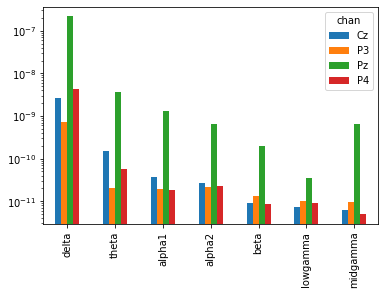

In [33]:
df_psd_fb.plot(kind='bar', logy=True) #logy to scale the delta

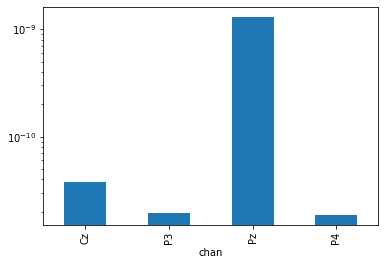

In [34]:
#plotting certain frequency
chans = ['Cz', 'P3', 'Pz', 'P4']
df_psd_fb[chans].loc['alpha1'].plot(kind='bar', logy=True)

In [35]:
events = find_events(raw)

Trigger channel has a non-zero initial value of 1 (consider using initial_event=True to detect this event)
1 events found
Event IDs: [2]
